PCA and LSA comparison on Original Corpus
Explained variance for PCA on Original Corpus: [0.01373884 0.00676663]


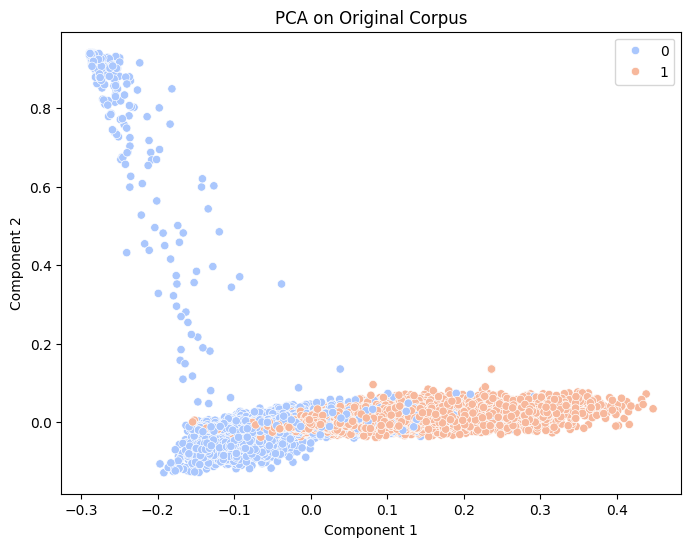

Explained variance for LSA on Original Corpus: [0.01225807 0.00682125]


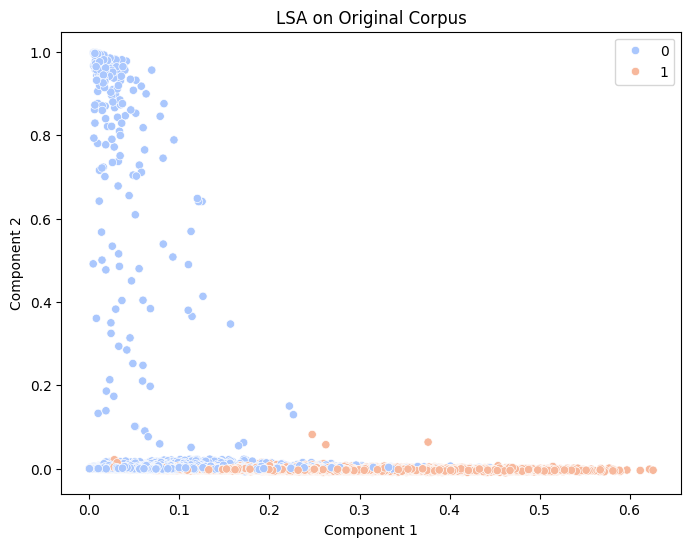


PCA and LSA comparison on Cleaned Corpus
Explained variance for PCA on Cleaned Corpus: [0.01434696 0.00592135]


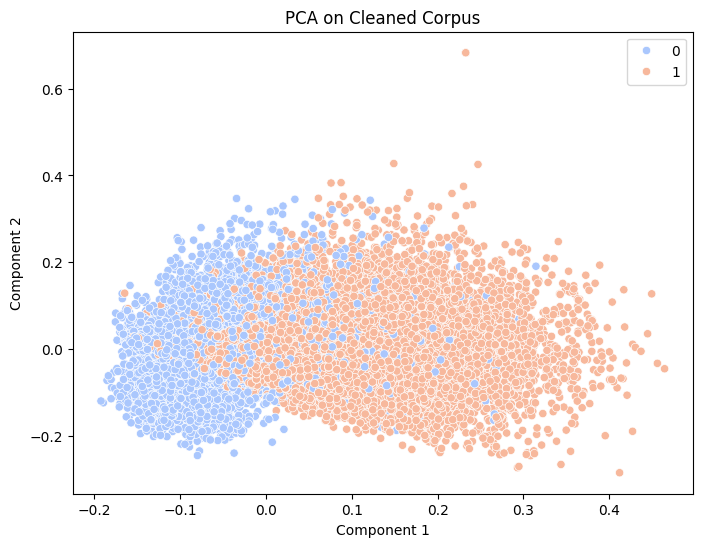

Explained variance for LSA on Cleaned Corpus: [0.01293455 0.00612942]


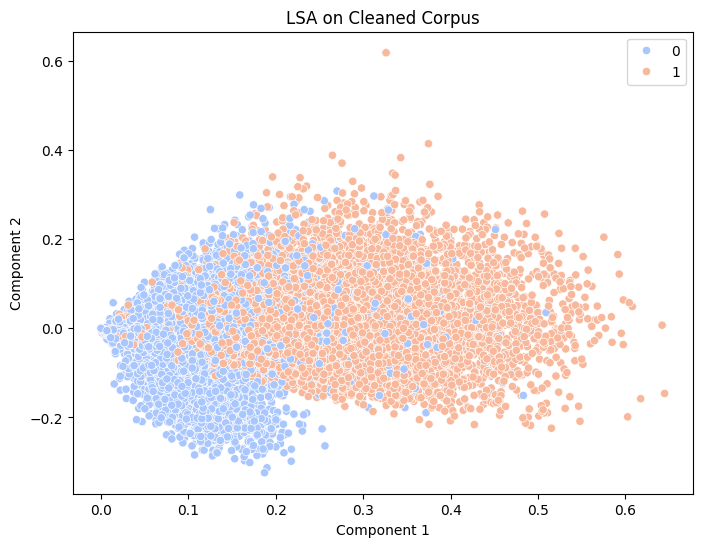

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import seaborn as sns

# Load the original and cleaned corpora
org_corpus = pd.read_csv('data/mental_health.csv')
cln_corpus = pd.read_csv('data/cleaned_mhc.csv')

def vectorize_and_reduce(corpus, method='PCA', n_components=2):
    X = corpus['text']
    y = corpus['label']

    # Vectorize the text data using TF-IDF
    vectorizer = TfidfVectorizer(max_features=15000)
    X_tfidf = vectorizer.fit_transform(X).toarray()

    # Apply dimensionality reduction
    if method == 'PCA':
        reducer = PCA(n_components=n_components)
        X_reduced = reducer.fit_transform(X_tfidf)
        explained_variance = reducer.explained_variance_ratio_
    elif method == 'LSA':
        reducer = TruncatedSVD(n_components=n_components)
        X_reduced = reducer.fit_transform(X_tfidf)
        explained_variance = reducer.explained_variance_ratio_

    return X_reduced, y, explained_variance


def plot_reduced_data(X_reduced, y, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=y, palette='coolwarm')
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend(loc='best')
    plt.show()

def compare_pca_lsa(corpus, corpus_name):
    # PCA on the corpus
    X_pca, y, pca_explained = vectorize_and_reduce(corpus, method='PCA')
    print(f'Explained variance for PCA on {corpus_name} Corpus: {pca_explained}')
    plot_reduced_data(X_pca, y, f'PCA on {corpus_name} Corpus')

    # LSA on the corpus
    X_lsa, y, lsa_explained = vectorize_and_reduce(corpus, method='LSA')
    print(f'Explained variance for LSA on {corpus_name} Corpus: {lsa_explained}')
    plot_reduced_data(X_lsa, y, f'LSA on {corpus_name} Corpus')

# Compare PCA and LSA on the original corpus
print("PCA and LSA comparison on Original Corpus")
compare_pca_lsa(org_corpus, "Original")

# Compare PCA and LSA on the cleaned corpus
print("\nPCA and LSA comparison on Cleaned Corpus")
compare_pca_lsa(cln_corpus, "Cleaned")